In [1]:

import requests
import pandas as pd
from bs4 import BeautifulSoup
pages = []
conf_name = []
conf_date = []
for i in range(1, 6):
      url = 'http://www.allconferences.com/search/index/Category__parent_id:493194/Conference__start_date__from:03-03-2010/Conference__start_date__to:03-03-2012/showLastConference:1/page:' + str(i) + '/'
     
    
      pages.append(url)
        
for page in pages: 
    #collecting the first page of conferences and creating a beautiful soup object
    page = requests.get(page)
    soup = BeautifulSoup(page.text, 'html.parser')

    #Extracting the text form the webpage from the div element with class categories_conferences
    C_list = soup.find(id ='categories_conferences')

    #Removing the links and Superfluous Data from the text
    last_links_1 = soup.find(class_='order_option')
    last_links_1.decompose()
    last_links_2 = soup.find(class_='pager')
    last_links_2.decompose()
    last_links_3 = soup.find(id='categoryViewFormEmptList')
    last_links_3.decompose()

    #extracting text from all the instances of h2 tag within the div element
    list_items = C_list.find_all('h2')

    for x in list_items:
        names = x.a.text
        conf_name.append(names)
        print(names)

    list_items_date = C_list.find_all('span')
    
    for k in list_items_date:
        date = k.contents[1].strip()
        conf_date.append(date)
        print(date)

Internationa Conference on Advanced Information System , E-Education and Development
The 6th IEEE International Symposium on   Service-Oriented System Engineering
The 3rd International Workshop on Cognitive-based Text Understanding and Web Wisdom
Computer Science and Engineering 2011
16th International ITA Workshop
Joomla Day Midwest
IADIS International Conference WWW/Internet 2011
Social India Conference 2011
The 2011 International Conference and Workshop on Current Trends in Information Technology
The 11th IFIP Conference on e-Business, e-Service, e-Society
Silicon Valley Conference
newdomains.org - The Munich Conference on new gTLDs
Workshop on Software Services Semantic-based software services
TAVA11 - Special Track on Theory and Applications of Visual Analytics
2011 International Conference on Active Media Technology
Fourth International Conference on Internet Technologies and Applications
The 8th Annual Collaboration, Electronic messaging, Anti-Abuse and Spam Conference
EEUK
8th 

In [2]:
print(conf_name)

[u'Internationa Conference on Advanced Information System , E-Education and Development', u'The 6th IEEE International Symposium on   Service-Oriented System Engineering', u'The 3rd International Workshop on Cognitive-based Text Understanding and Web Wisdom', u'Computer Science and Engineering 2011', u'16th International ITA Workshop', u'Joomla Day Midwest', u'IADIS International Conference WWW/Internet 2011', u'Social India Conference 2011', u'The 2011 International Conference and Workshop on Current Trends in Information Technology', u'The 11th IFIP Conference on e-Business, e-Service, e-Society', u'Silicon Valley Conference', u'newdomains.org - The Munich Conference on new gTLDs', u'Workshop on Software Services Semantic-based software services', u'TAVA11 - Special Track on Theory and Applications of Visual Analytics', u'2011 International Conference on Active Media Technology', u'Fourth International Conference on Internet Technologies and Applications', u'The 8th Annual Collaborat

In [4]:

while("" in conf_date) : 
    conf_date.remove("u'")
print(conf_date)

[u'Feb 08, 2012', u'Dec 14, 2011', u'Nov 26, 2011', u'Nov 24, 2011', u'Nov 12, 2011', u'Nov 08, 2011', u'Oct 27, 2011', u'Oct 14, 2011', u'Oct 10, 2011', u'Sep 27, 2011', u'Sep 21, 2011', u'Sep 07, 2011', u'Sep 09, 2011', u'Sep 09, 2011', u'Sep 02, 2011', u'Aug 26, 2011', u'Aug 19, 2011', u'Aug 10, 2011', u'Jul 20, 2011', u'Jul 14, 2011', u'Jun 29, 2011', u'Jun 29, 2011', u'Jun 09, 2011', u'Jun 08, 2011', u'Jun 04, 2011', u'May 27, 2011', u'May 25, 2011', u'May 25, 2011', u'May 19, 2011', u'May 06, 2011', u'May 04, 2011', u'Apr 20, 2011', u'Apr 02, 2011', u'Mar 29, 2011', u'Mar 29, 2011', u'Mar 25, 2011', u'Mar 15, 2011', u'Mar 09, 2011', u'Feb 12, 2011', u'Jan 29, 2011', u'Dec 15, 2010', u'Dec 10, 2010', u'Dec 10, 2010', u'Dec 03, 2010', u'Dec 01, 2010', u'Nov 18, 2010', u'Nov 19, 2010', u'Nov 04, 2010', u'Oct 30, 2010', u'Oct 22, 2010', u'Oct 09, 2010', u'Oct 26, 2010', u'Sep 22, 2010', u'Sep 23, 2010', u'Sep 22, 2010', u'Sep 20, 2010', u'Sep 09, 2010', u'Sep 03, 2010', u'Sep 03, 201

In [15]:

s = pd.to_datetime(pd.Series(conf_date), format='%b %d, %Y',errors="coerce")
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)

#Printing the count of conferences that took place in each month
print (s)

2010-03    2
2010-04    2
2010-05    3
2010-06    2
2010-07    1
2010-08    3
2010-09    7
2010-10    4
2010-11    3
2010-12    5
2011-01    1
2011-02    1
2011-03    5
2011-04    2
2011-05    6
2011-06    5
2011-07    2
2011-08    3
2011-09    6
2011-10    3
2011-11    4
2011-12    1
2012-01    0
2012-02    1
Freq: M, dtype: int64


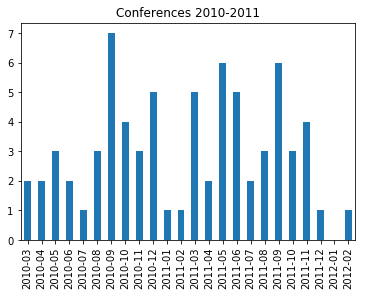

In [17]:
s.plot.bar(title='Conferences 2010-2011')

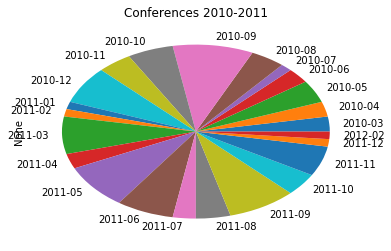

In [18]:
s.plot.pie(title='Conferences 2010-2011')

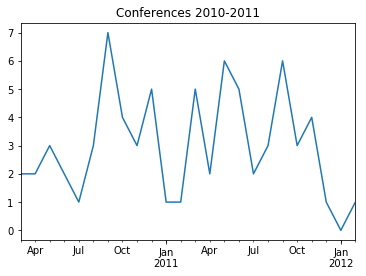

In [19]:
s.plot.line(title='Conferences 2010-2011')

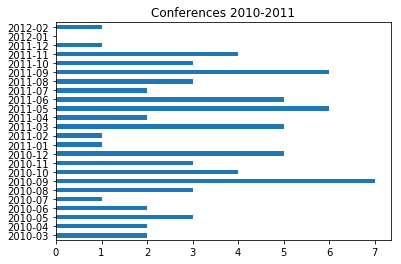

In [20]:
s.plot.barh(title='Conferences 2010-2011')